# Logistic Regression on Titanic Dataset

## 1. Data Exploration

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

### Display Information about Training Dataset

In [22]:
# Display basic information and the first few rows of the training data
print(train_data.info())
display(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Display Testing dataset information

In [23]:
# Display basic information and the first few rows of the training data
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Now Focus on Training Dataset (For analysis and Model Building)

In [24]:
# Display summary statistics
summary_stats = train_data.describe(include='all')
summary_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Key Insights:

1. **Survival Rate**: About **38.4%** of passengers survived.

2. **Passenger Class**: Majority were in lower classes (2 or 3).

3. **Age**: Average age was **29.7 years** with a wide range (0.42 to 80 years). Some ages are missing.

4. **Family Size**:
   - Most passengers traveled alone or with 1-2 family members.
   - `SibSp` and `Parch` can be combined for a total family size feature.

5. **Fare**: Fares varied widely, with an average of **£32.20** and a maximum of **£512.33**.

6. **Cabin**: Significant missing data; might need to be dropped or imputed.

7. **Embarked**: Majority embarked from `S` (Southampton).

In [25]:
# Display data types
data_types = train_data.dtypes
data_types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# Identify categorical and numeric features
categorical_features = ['Pclass', 'Sex', 'Embarked'] 
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns

### Visualizations

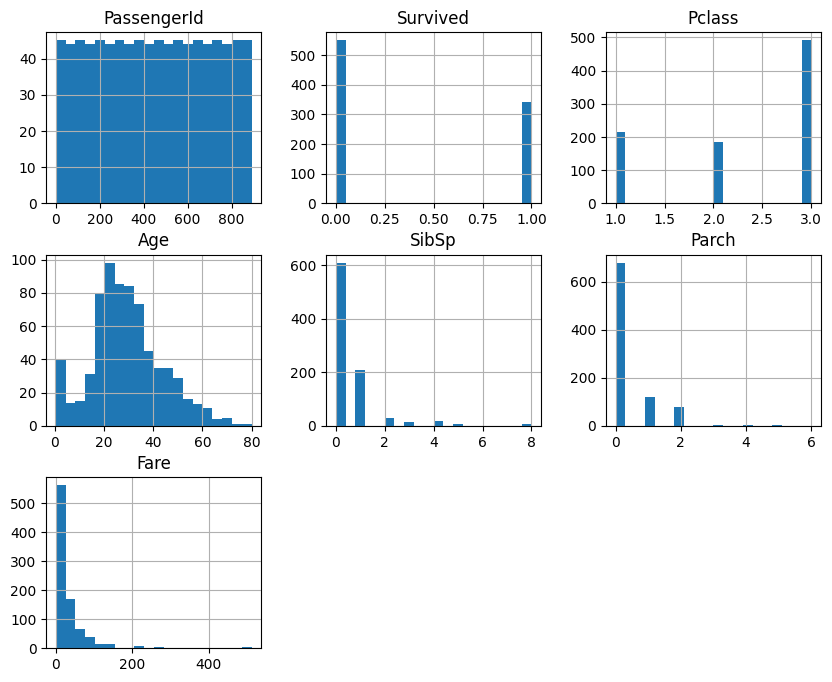

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numeric features
train_data[numeric_features].hist(bins=20, figsize=(10, 8))
plt.show()

### Key insights:

1. **PassengerId**:
   - It's uniformly distributed as expected since it's just a unique identifier.

2. **Survival Rate (Survived)**:
   - There are more passengers who did not survive (0) compared to those who did (1). The dataset is imbalanced with a higher number of non-survivors.

3. **Passenger Class (Pclass)**:
   - Most passengers were in 3rd class, followed by 1st and then 2nd class. 
   - The survival analysis can be further refined by looking at how survival rates differ across these classes.

4. **Age**:
   - The age distribution is right-skewed with most passengers aged between 20 and 40. 
   - There are also a significant number of children and very few elderly passengers.

5. **Siblings/Spouses Aboard (SibSp)**:
   - Most passengers did not have siblings or spouses aboard (SibSp = 0).
   - A small number had 1 or 2, with very few having 3 or more.

6. **Parents/Children Aboard (Parch)**:
   - Similar to `SibSp`, most passengers did not have parents or children aboard (Parch = 0).
   - There are a few passengers with 1 or 2, and very few with 3 or more.

7. **Fare**:
   - The fare distribution is highly right-skewed, with most passengers paying low fares. 
   - There are a few passengers who paid significantly higher fares, likely those in 1st class.

<Figure size 1000x600 with 0 Axes>

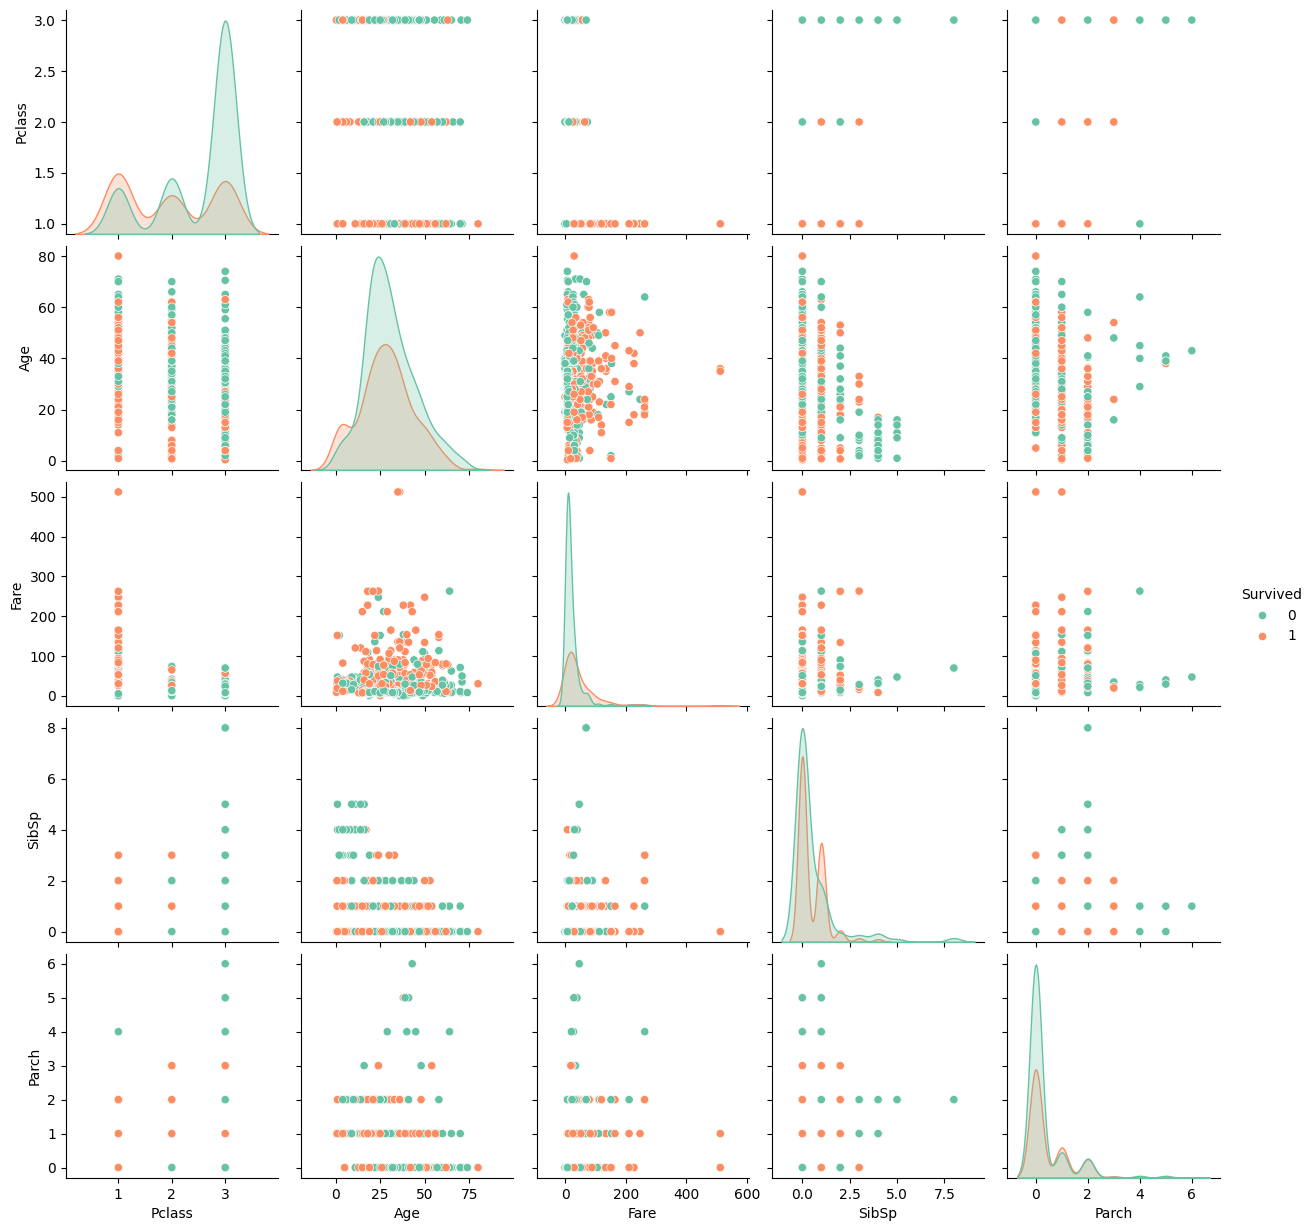

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot
plt.figure(figsize=(10, 6))
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived', palette='Set2', diag_kind='kde')

# Display the plot
plt.show()

### Insights:

1. **Passenger Class (Pclass)**:
   - There's a visible separation in survival across different classes. 
   - Passengers in 1st class (Pclass=1) had a higher chance of survival compared to those in 2nd and 3rd classes.

2. **Age**:
   - Younger passengers (children) seem to have higher survival rates, as indicated by the concentration of green points at lower ages.
   - The distribution shows that survivors are more likely to be younger compared to non-survivors.

3. **SibSp (Siblings/Spouses Aboard)**:
   - The survival chances are higher for passengers with 1 or 2 siblings/spouses aboard, but having 3 or more decreases survival probability.

4. **Parch (Parents/Children Aboard)**:
   - Passengers with fewer parents/children aboard (Parch=1 or 2) show a better survival rate than those with more or none.

5. **Fare**:
   - Higher fares are associated with higher survival rates, which correlates with the fact that passengers in 1st class, who paid higher fares, had better chances of survival.

6. **Correlations**:
   - There is a slight correlation between `Fare` and `Pclass`, which makes sense as higher classes generally paid more.
   - There doesn’t seem to be a strong correlation between `Age` and other features, suggesting age alone isn't a strong predictor.

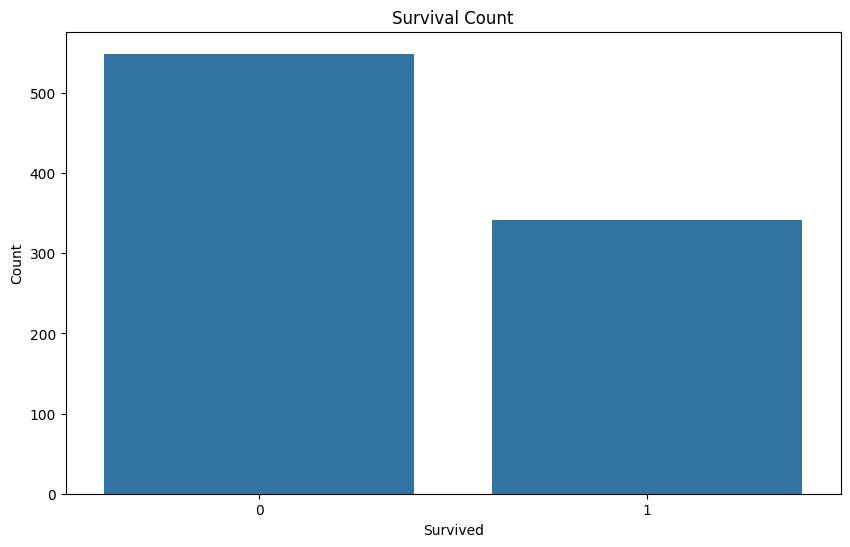

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### Key Insight:

- **Survival Disparity**: The chart indicates that more passengers did not survive the Titanic disaster compared to those who did. Specifically, the count of non-survivors is significantly higher than that of survivors, reflecting the tragic loss of life.

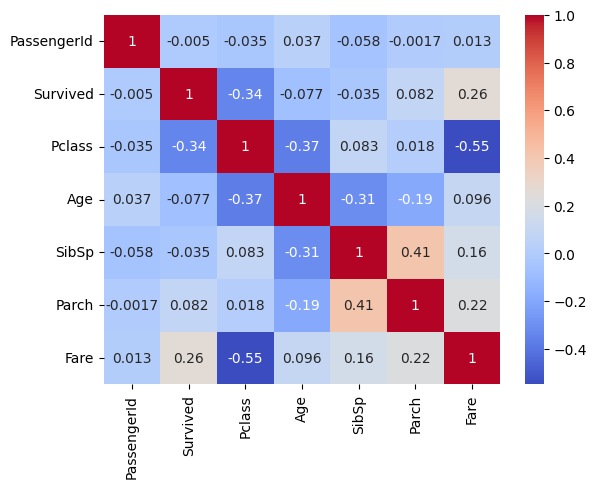

In [30]:
# Correlation matrix
corr_matrix = train_data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Insights

1. **Pclass and Fare**: There is a strong negative correlation (-0.55) between `Pclass` (Passenger Class) and `Fare`, indicating that passengers in lower classes paid less for their tickets.

2. **Pclass and Survived**: There is a moderate negative correlation (-0.34) between `Pclass` and `Survived`, suggesting that passengers in higher classes had a better chance of survival.

3. **SibSp and Parch**: The correlation between `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) is 0.41, indicating that passengers with more siblings/spouses likely also had more parents/children with them.

4. **Fare and Survived**: There is a moderate positive correlation (0.26) between `Fare` and `Survived`, suggesting that passengers who paid higher fares had a better chance of survival.

5. **Age and Pclass**: A negative correlation (-0.37) between `Age` and `Pclass` suggests that younger passengers were more likely to be in lower classes.

6. **No Strong Multicollinearity**: There doesn’t seem to be any extreme correlations (close to 1 or -1) between independent variables, which reduces concerns about multicollinearity.

## 2. Data Preprocessing  (Training and Testing Dataset)

### Checking missing values

In [31]:
# Checking Missing values in Train
print('Missing Values in Training Data')
display(train_data.isnull().sum())
print('\n')
# Checking Missing values in Testing Data
print('Missing Values in Testing Data')
display(test_data.isnull().sum())

Missing Values in Training Data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Missing Values in Testing Data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Imputation and Label encoding

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Combine training and test data to ensure all labels are captured
combined_data = pd.concat([train_data, test_data])

# Handling missing values
age_imputer = SimpleImputer(strategy='median')
embarked_imputer = SimpleImputer(strategy='most_frequent')
fare_imputer = SimpleImputer(strategy='median')

combined_data['Age'] = age_imputer.fit_transform(combined_data[['Age']])
combined_data['Embarked'] = embarked_imputer.fit_transform(combined_data[['Embarked']]).ravel()
combined_data['Fare'] = fare_imputer.fit_transform(combined_data[['Fare']]).ravel()

# Dropping the Cabin column due to high percentage of missing values
combined_data = combined_data.drop(columns=['Cabin'])

# Encoding categorical variables (Sex and Embarked)
label_encoder = LabelEncoder()

combined_data['Sex'] = label_encoder.fit_transform(combined_data['Sex'])
combined_data['Embarked'] = label_encoder.fit_transform(combined_data['Embarked'])

# Split the combined data back into train and test sets
train_data = combined_data.iloc[:len(train_data), :]
test_data = combined_data.iloc[len(train_data):, :]

# Display the first few rows of the processed training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


### Feature Selection and Data Splitting

In [36]:
# Preparing Training and Testing Data for Model Building
x_train = train_data.drop(columns=['Survived', 'Name', 'Ticket','PassengerId'])
y_train = train_data['Survived']
x_test = test_data.drop(columns= ['Survived', 'Name', 'Ticket','PassengerId'])
y_test = test_data['Survived']

# Display the preprocessed data
display(x_train[:5])
display(y_train[:5])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [37]:
display(x_test.head())
display(y_test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

**Note** - Since y_test is unavailable, we can build the model using the training data (x_train and y_train), make predictions on x_test, and evaluate the model using cross-validation or by checking performance metrics on the training data itself. 

## 3. Model Building

### Train the Model:

In [38]:
from sklearn.linear_model import LogisticRegression

# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

c:\Users\Pradeep Kumar\.ai-navigator\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Make Predictions on Test Data:

In [39]:
# Predict on the test data
y_pred_test = model.predict(x_test)
y_pred_proba_test = model.predict_proba(x_test)[:, 1]

## 4. Model Evaluation

### Evaluate the Model Using Training Data:  (Because y_test is unavailable)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the training data
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)[:, 1]

# Evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1 Score:", f1_train)
print("Training ROC AUC:", roc_auc_train)

Training Accuracy: 0.8002244668911336
Training Precision: 0.7611464968152867
Training Recall: 0.6988304093567251
Training F1 Score: 0.7286585365853658
Training ROC AUC: 0.8570207394624996


#### Model's performance metrics on the training data provide some valuable insights:

**1. Accuracy (80%)**
- **What it means:** The model correctly predicts the outcome 80% of the time. While this is a decent accuracy.

**2. Precision (76.11%)**
- **What it means:** All the instances that the model predicted as positive (e.g., predicting a passenger survived), 76.11% were actually positive. This indicates that when the model predicts survival, it’s correct 75.08% of the time.

**3. Recall (69.88%)**
- **What it means:** Out of all actual positive instances (e.g., passengers who actually survived), the model correctly identifies 69.88%. This indicates that the model is missing some true positives.

**4. F1 Score (72.86%)**
- **What it means:** The F1 score is a balance between precision and recall. With an F1 score of 72.86%, your model is fairly balanced.

**5. ROC AUC (85.70%)**
- **What it means:** The ROC AUC score of 85.70% indicates that the model has a good ability to distinguish between the positive and negative classes. A score closer to 1 would be ideal, but this score suggests the model is performing well in terms of classification.

### ROC curve visualization

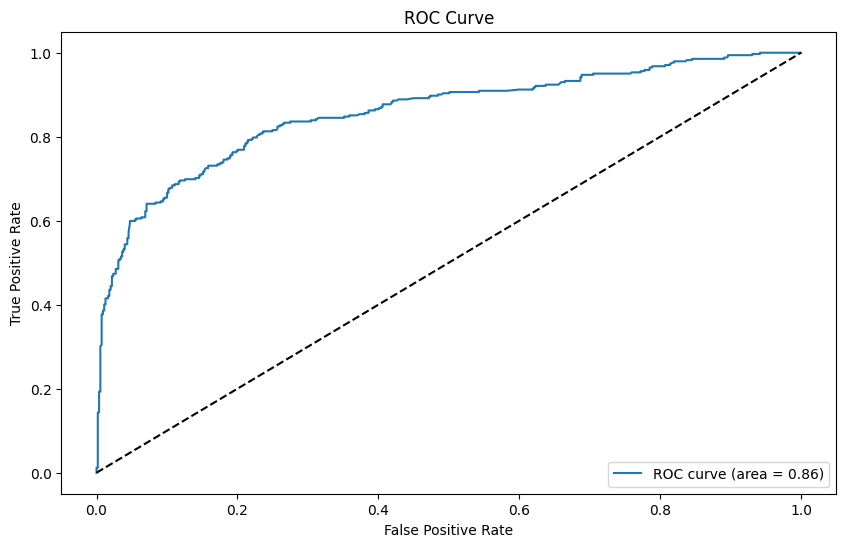

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_train)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for a random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Interpretation

In [42]:
import numpy as np

# Get the feature names from x_train
feature_names = x_train.columns

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display the feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the absolute value of the coefficients and add it to the DataFrame
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the DataFrame
coef_df


,Feature,Coefficient,Abs_Coefficient
1,Sex,-2.630802,2.630802
0,Pclass,-1.050167,1.050167
3,SibSp,-0.315827,0.315827
6,Embarked,-0.213857,0.213857
4,Parch,-0.084903,0.084903
2,Age,-0.038029,0.038029
5,Fare,0.002159,0.002159


#### **Key Insights:**

1. **Sex (-2.63):**
   - Being male significantly reduces the likelihood of survival. Gender is the most influential factor in this model.

2. **Pclass (-1.05):**
   - Passengers in higher classes (lower `Pclass` values) had a better chance of survival. Class status is the second most important factor.

3. **SibSp (-0.32):**
   - Having more siblings or spouses aboard slightly decreases survival chances, but the effect is less pronounced.

4. **Other Features:**
   - `Embarked`, `Parch`, `Age`, and `Fare` have smaller coefficients, indicating a weaker influence on survival compared to `Sex` and `Pclass`.

## 6. Save Model

In [43]:
import pickle

# Save the trained model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Interview Questions:

### 1. What is the difference between precision and recall?

Precision and recall are two fundamental metrics in binary classification. They help evaluate the performance of a model in predicting positive and negative classes.

**Precision:** It's the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (incorrectly predicted positive instances). In other words, it measures how accurate the model is when predicting positive instances.

**Precision** = True Positives / (True Positives + False Positives)

**Recall:** It's the ratio of true positives to the sum of true positives and false negatives (missed positive instances). In other words, it measures how well the model detects all positive instances.

**Recall** = True Positives / (True Positives + False Negatives)

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to evaluate the performance of a model by training and testing it on multiple subsets of the data. This helps to:

- **Reduce overfitting:** By training and testing the model on different subsets, you can avoid overfitting to a specific subset.
- **Increase model reliability:** Cross-validation provides a more accurate estimate of the model's performance on unseen data.

In binary classification, cross-validation is essential because it helps to:

- Evaluate the model's performance on both positive and negative classes.
- Identify the optimal hyperparameters for the model.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.